In [2]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np

### 1. Cargar datos

#### 1.1. Cargar datos IRRA

In [4]:
IRRA= pd.read_csv('./data/IRRA_Santiago.csv',delimiter='|',header=0)
IRRA=IRRA.rename(columns={"Instante lectura": "lectura", "Irradiacion global diaria": "irradiacion"})
IRRA.info()
IRRA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   lectura      6141 non-null   object
 1   irradiacion  6141 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 96.1+ KB


,irradiacion
count,6141.000000
mean,990.942192
std,2063.617028
min,-9999.000000
25%,583.000000
50%,1135.000000
75%,1944.000000
max,3123.000000


#### 2. Cargar datos TM

In [5]:
TM = pd.read_csv('./data/TM_Santiago.csv',delimiter='|',header=0)
TM=TM.rename(columns={"Fecha": "fecha", "TM": "tm"})
TM.info()
TM.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   6141 non-null   object 
 1   tm      6141 non-null   float64
dtypes: float64(1), object(1)
memory usage: 96.1+ KB


,tm
count,6141.000000
mean,-206.684074
std,1484.840558
min,-9999.000000
25%,13.100000
50%,17.500000
75%,22.600000
max,40.000000


#### 2. Cargar datos P

In [6]:
P = pd.read_csv('./data/P_Santiago.csv',delimiter='|',header=0)
P=P.rename(columns={"Fecha": "fecha", "P": "p"})
P.info()
P.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   6141 non-null   object 
 1   p       6141 non-null   float64
dtypes: float64(1), object(1)
memory usage: 96.1+ KB


,p
count,6141.000000
mean,639.373701
std,1926.719198
min,-9999.000000
25%,984.200000
50%,988.500000
75%,992.300000
max,1011.600000


### 2. Detección e eliminación de outliers

#### 2.1. Detección e eliminación de outliers en IRRA

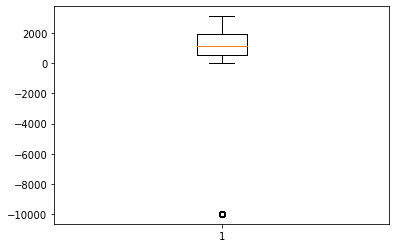

In [7]:
box=plt.boxplot(IRRA.irradiacion)

<AxesSubplot:xlabel='lectura', ylabel='irradiacion'>

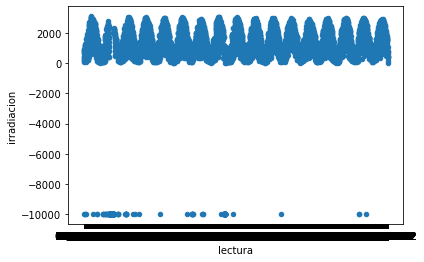

In [8]:
IRRA.plot(kind='scatter', x='lectura', y='irradiacion')

In [10]:
#Eliminar outliers
IRRA=IRRA.replace({-9999:None})

<AxesSubplot:xlabel='lectura', ylabel='irradiacion'>

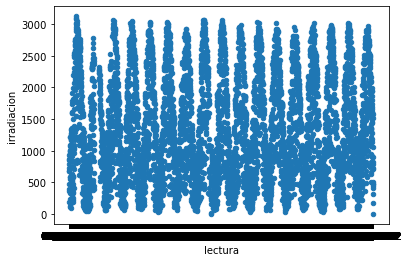

In [11]:
IRRA.plot(kind='scatter', x='lectura', y='irradiacion')

In [13]:
IRRA.fillna(method ='ffill', inplace = True)

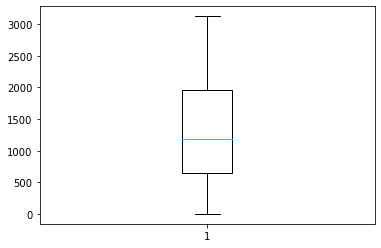

In [14]:
box2 = plt.boxplot(IRRA.irradiacion)
plt.show()

### 2.2. Detección e eliminación de outliers en TM

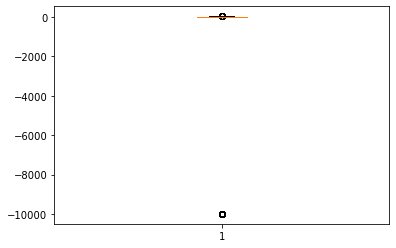

In [15]:
box = plt.boxplot(TM.tm)

<AxesSubplot:xlabel='fecha', ylabel='tm'>

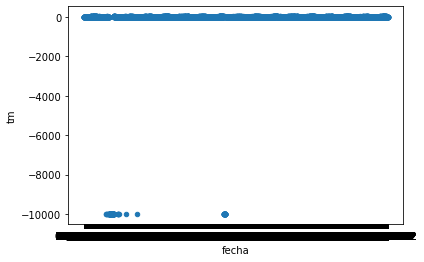

In [16]:
TM.plot(kind='scatter', x='fecha', y='tm')

In [17]:
#Eliminar outliers
TM=TM.replace({-9999:None})

In [18]:
TM.fillna(method ='ffill', inplace = True)

<AxesSubplot:xlabel='fecha', ylabel='tm'>

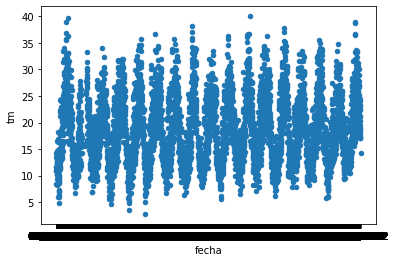

In [19]:
TM.plot(kind='scatter', x='fecha', y='tm')

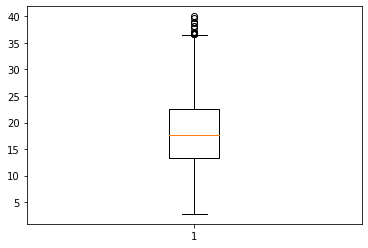

In [20]:
box2 = plt.boxplot(TM.tm)
plt.show()


[array([36.9, 38.9, 39.6, 36.6, 38.2, 37.0, 36.6, 36.6, 40.0, 37.0, 37.8,
       39.0, 36.7, 38.7], dtype=object)]
36.9
38.9
39.6
36.6
38.2
37.0
36.6
36.6
40.0
37.0
37.8
39.0
36.7
38.7


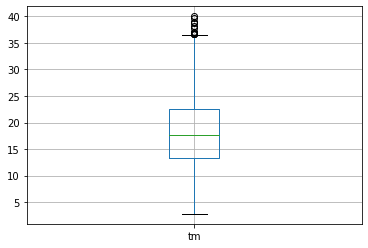

In [21]:
_, bp = pd.DataFrame.boxplot(TM, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
print(outliers)
for o in outliers[0]:
    print(o)
    TM=TM.replace({o:None})


In [22]:
TM.fillna(method ='ffill', inplace = True)

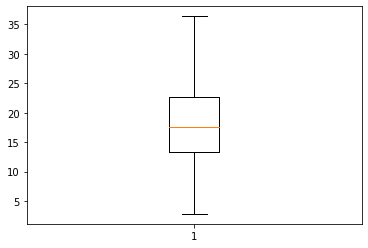

In [23]:
box2 = plt.boxplot(TM.tm)
plt.show()

### 2.2. Detección e eliminación de outliers en P

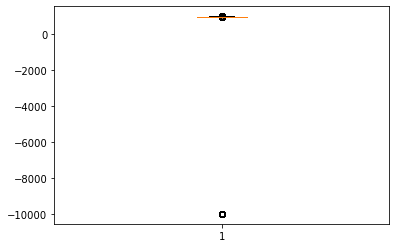

In [24]:
box=plt.boxplot(P.p)

<AxesSubplot:xlabel='fecha', ylabel='p'>

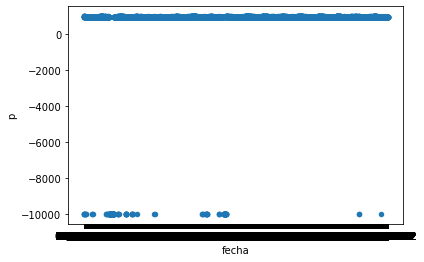

In [25]:
P.plot(kind='scatter', x='fecha', y='p')

In [26]:
#Eliminar outliers
P=P.replace({-9999:None})


In [27]:
P.fillna(method ='ffill', inplace = True)


<AxesSubplot:xlabel='fecha', ylabel='p'>

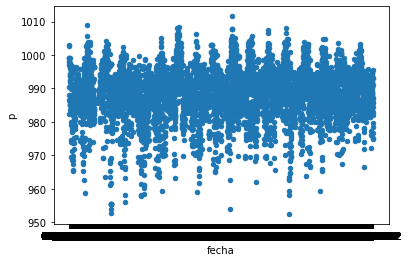

In [28]:
P.plot(kind='scatter', x='fecha', y='p')

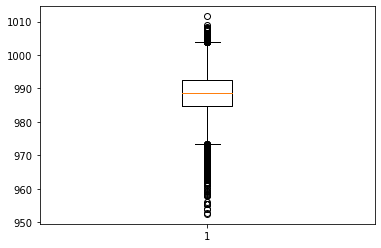

In [29]:
box2 = plt.boxplot(P.p)
plt.show()

[array([969.4, 971.4, 968.7, 969.8, 965.3, 965.6, 968.5, 967.4, 971.8,
       970.4, 972.5, 965.2, 967.9, 970.8, 967.5, 969.9, 971.5, 962.7,
       972.3, 972.2, 958.7, 972.4, 973.2, 971.5, 972.2, 969.3, 969.3,
       972.6, 963.6, 967.6, 965.2, 963.6, 968.6, 968.2, 961.2, 961.7,
       969.2, 952.9, 954.0, 955.4, 955.4, 955.4, 955.4, 955.4, 955.4,
       967.6, 973.3, 966.6, 971.5, 968.3, 970.0, 973.3, 956.0, 965.9,
       966.5, 958.1, 963.1, 972.0, 969.4, 967.9, 958.3, 964.6, 961.4,
       957.8, 968.6, 969.4, 965.7, 967.0, 971.9, 967.0, 960.2, 964.0,
       969.9, 961.1, 961.0, 967.4, 967.9, 958.5, 972.2, 973.2, 969.7,
       970.1, 966.2, 972.3, 968.8, 968.7, 964.0, 969.7, 964.0, 968.5,
       965.8, 964.5, 971.8, 972.9, 964.9, 963.6, 972.4, 970.1, 970.8,
       959.4, 971.8, 973.0, 969.9, 972.0, 970.1, 971.5, 970.5, 967.2,
       968.3, 967.3, 963.1, 968.5, 969.7, 972.9, 973.1, 970.6, 972.8,
       970.1, 971.0, 959.2, 973.0, 973.0, 966.1, 961.7, 963.7, 965.5,
       971.2, 969.2

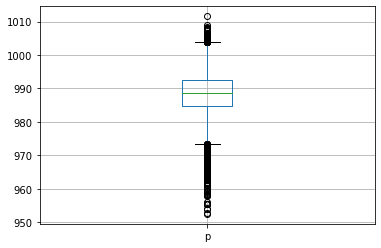

In [30]:
_, bp = pd.DataFrame.boxplot(P, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
print(outliers)
for o in outliers[0]:
    P=P.replace({o:None})

In [31]:
P.fillna(method ='ffill', inplace = True)

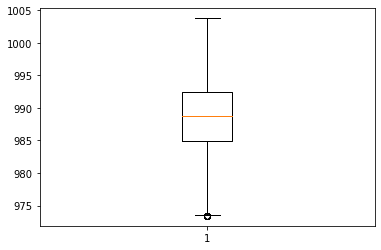

In [32]:
box2 = plt.boxplot(P.p)
plt.show()

[array([973.4, 973.4, 973.4, 973.4, 973.4, 973.4, 973.4, 973.4, 973.4],
      dtype=object)]


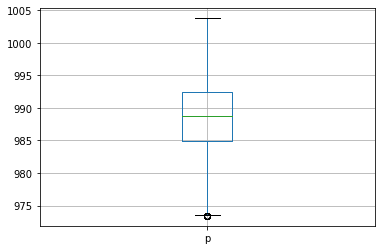

In [33]:
_, bp = pd.DataFrame.boxplot(P, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
print(outliers)
for o in outliers[0]:
    P=P.replace({o:None})

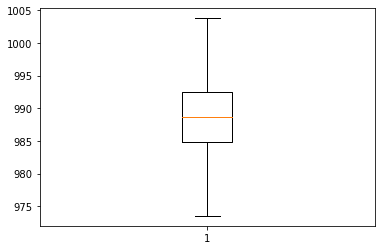

In [34]:
P.fillna(method ='ffill', inplace = True)
box2 = plt.boxplot(P.p)
plt.show()

## 2. Creación de series de tiempo

### 2.1. Creación de series de tiempo para IRRA

In [36]:
IRRA["lectura"] = pd.to_datetime(IRRA["lectura"], format='%d/%m/%Y')
IRRA = IRRA.set_index("lectura")
IRRA = IRRA.asfreq('MS')

IRRA["irradiacion1"]=[None]+np.diff(IRRA.irradiacion).tolist()
IRRA["irradiacion2"]=[None]+np.diff(IRRA.irradiacion1).tolist()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


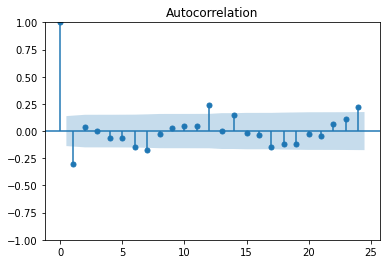

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
IRRA["irradiacion1"].iloc[0] = 0
plot_acf(IRRA["irradiacion1"])
plt.show()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


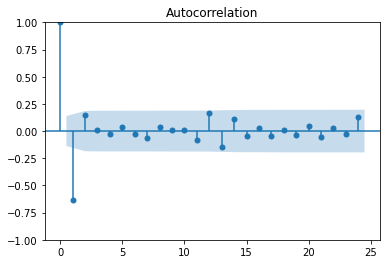

In [38]:
IRRA["irradiacion2"].iloc[0] = 0
IRRA["irradiacion2"].iloc[1] = 0

plot_acf(IRRA["irradiacion2"])
plt.show()

<IPython.core.display.Javascript object>


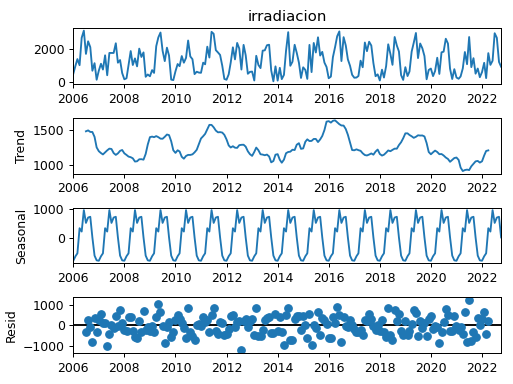

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib notebook
#IRRA2=IRRA.set_index(pd.DatetimeIndex(IRRA['lectura'].values))
#.asfreq('y')
#IRRA2=IRRA2.ffill()
result = seasonal_decompose(IRRA["irradiacion"], model='aditive')
result.plot()
plt.show()

In [19]:
%matplotlib inline

<IPython.core.display.Javascript object>


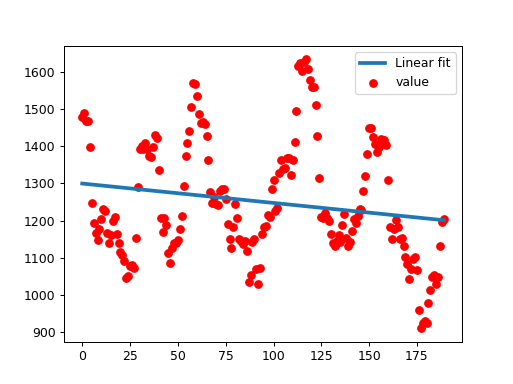

In [40]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()

res = result.trend[~np.isnan(result.trend)]
x = [i for i in range(0, res.shape[0])]
y = res
model.fit(np.array(x).reshape(-1, 1), y)
predictions = model.predict(np.array(x).reshape(-1, 1))

f, ax = plt.subplots(1, 1)
ax.plot(x, predictions,label='Linear fit', lw=3)
ax.scatter(x, y, label='value', marker='o', color='r')
ax.legend()
plt.show()

### 2.1. Creación de series de tiempo para TM

In [41]:
TM["fecha"] = pd.to_datetime(TM["fecha"], format='%d/%m/%Y')
TM = TM.set_index("fecha")
TM = TM.asfreq('MS')

TM["tm1"]=[None]+np.diff(TM.tm).tolist()
TM["tm2"]=[None]+np.diff(TM.tm1).tolist()

In [42]:
%matplotlib notebook


<IPython.core.display.Javascript object>


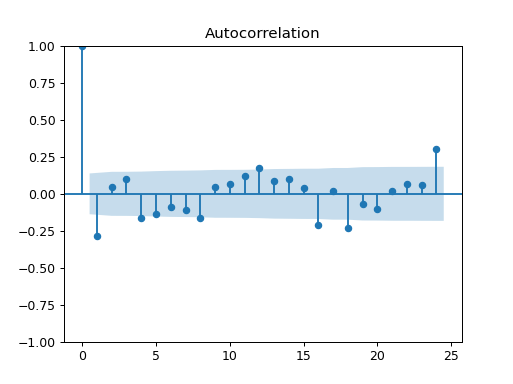

In [43]:
TM["tm1"].iloc[0] = 0
plot_acf(TM["tm1"])
plt.show()

<IPython.core.display.Javascript object>


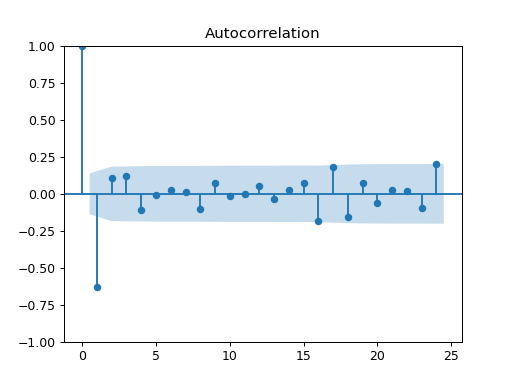

In [44]:
TM["tm2"].iloc[0] = 0
TM["tm2"].iloc[1] = 0

plot_acf(TM["tm2"])
plt.show()

<IPython.core.display.Javascript object>


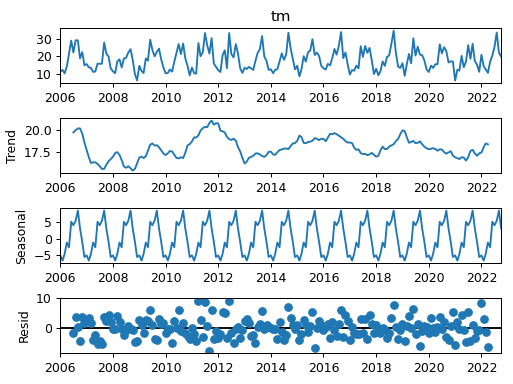

In [46]:
%matplotlib notebook
result2 = seasonal_decompose(TM["tm"], model='additive')
result2.plot()
plt.show()

In [87]:
%matplotlib inline

<IPython.core.display.Javascript object>


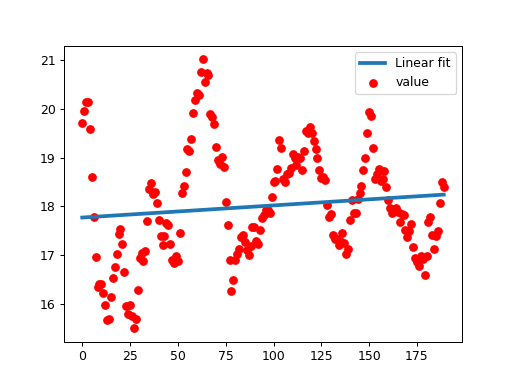

In [47]:
model = LinearRegression()

res = result2.trend[~np.isnan(result2.trend)]
x = [i for i in range(0, res.shape[0])]
y = res
model.fit(np.array(x).reshape(-1, 1), y)
predictions = model.predict(np.array(x).reshape(-1, 1))

f, ax = plt.subplots(1, 1)
ax.plot(x, predictions,label='Linear fit', lw=3)
ax.scatter(x, y, label='value', marker='o', color='r')
ax.legend()
plt.show()

#### Creación de series de tiempo para P

In [48]:
P["fecha"] = pd.to_datetime(P["fecha"], format='%d/%m/%Y')
P = P.set_index("fecha")
P = P.asfreq('MS')

P["p1"]=[None]+np.diff(P.p).tolist()
P["p2"]=[None]+np.diff(P.p1).tolist()

In [49]:
%matplotlib notebook

<IPython.core.display.Javascript object>


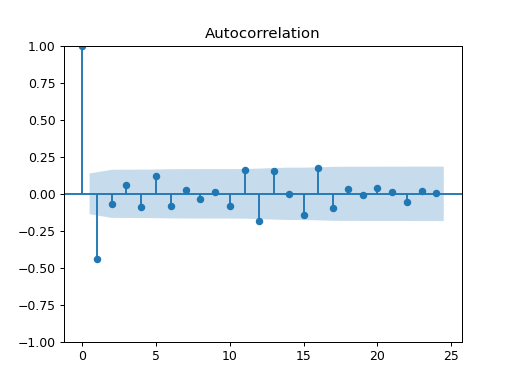

In [50]:
P["p1"].iloc[0] = 0
plot_acf(P["p1"])
plt.show()

<IPython.core.display.Javascript object>


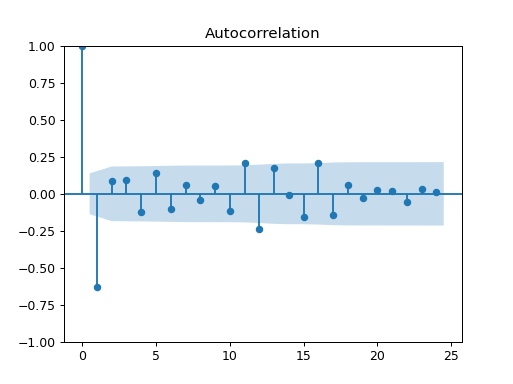

In [51]:
P["p2"].iloc[0] = 0
P["p2"].iloc[1] = 0

plot_acf(P["p2"])
plt.show()

<IPython.core.display.Javascript object>


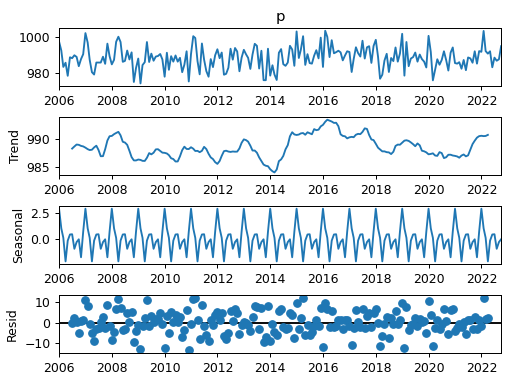

In [52]:
%matplotlib notebook
result3 = seasonal_decompose(P["p"], model='additive')
result3.plot()
plt.show()

In [69]:
%matplotlib inline

<IPython.core.display.Javascript object>


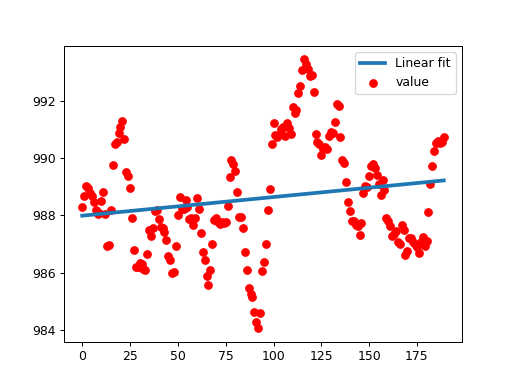

In [55]:
model = LinearRegression()


res = result3.trend[~np.isnan(result3.trend)]
x = [i for i in range(0, res.shape[0])]
y = res
model.fit(np.array(x).reshape(-1, 1), y)
predictions = model.predict(np.array(x).reshape(-1, 1))

f, ax = plt.subplots(1, 1)
ax.plot(x, predictions,label='Linear fit', lw=3)
ax.scatter(x, y, label='value', marker='o', color='r')
ax.legend()
plt.show()

#### Correlación cruzada

##### IRRA con TM

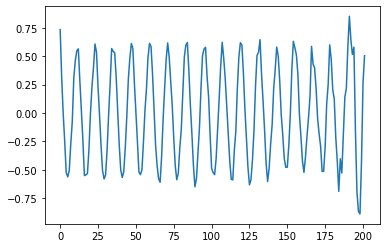

In [56]:
%matplotlib inline

import statsmodels.tsa.stattools as sts
correlacion = sts.ccf(IRRA["irradiacion"], TM["tm"])
plt.plot(correlacion)

In [57]:
IRRA["irradiacion"].corr(TM["tm"])

0.735546561319439

##### IRRA con P

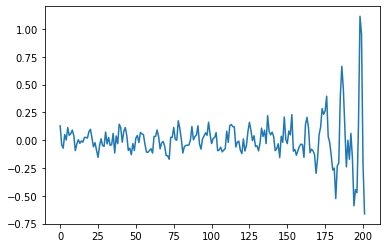

In [58]:
correlacion = sts.ccf(IRRA["irradiacion"], P["p"])
plt.plot(correlacion)

In [59]:
IRRA["irradiacion"].corr(P["p"])

0.12800526581063734

##### TM con P

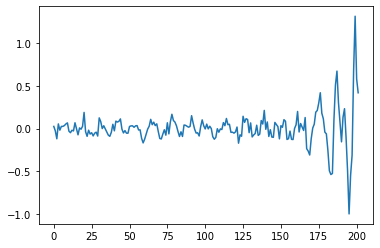

In [60]:
correlacion = sts.ccf(TM["tm"], P["p"])
plt.plot(correlacion)

In [61]:
TM["tm"].corr(P["p"])

0.02488311296920367

#### Media móvil IRRA

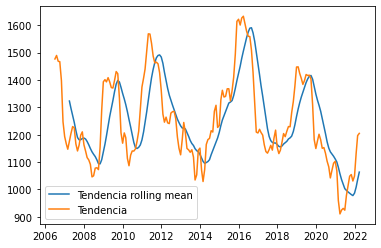

In [64]:
IRRA['media_movil'] = result.trend.rolling(10).mean()

plt.plot(IRRA['media_movil'], label='Tendencia rolling mean')
plt.plot(result.trend, label='Tendencia')
plt.legend()

plt.show()

#### Media móvil TM

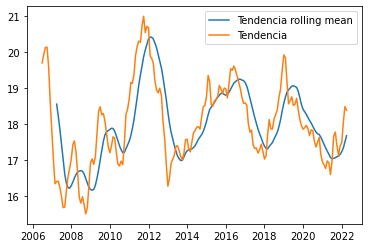

In [65]:
TM['media_movil'] = result2.trend.rolling(10).mean()

plt.plot(TM['media_movil'], label='Tendencia rolling mean')
plt.plot(result2.trend, label='Tendencia')
plt.legend()

plt.show()

#### Media móvil P

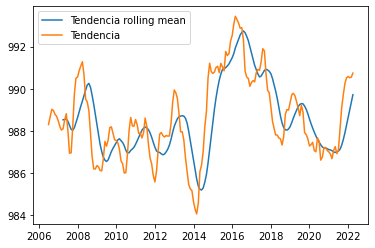

In [66]:
P['media_movil'] = result3.trend.rolling(10).mean()

plt.plot(P['media_movil'], label='Tendencia rolling mean')
plt.plot(result3.trend, label='Tendencia')
plt.legend()

plt.show()

Information of backtesting process
----------------------------------
Number of observations used for initial training: 161
Number of observations used for backtesting: 41
    Number of folds: 3
    Number of steps per fold: 20
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2019-05-01 00:00:00  (n=161)
    Validation: 2019-06-01 00:00:00 -- 2021-01-01 00:00:00  (n=20)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2021-01-01 00:00:00  (n=181)
    Validation: 2021-02-01 00:00:00 -- 2022-09-01 00:00:00  (n=20)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2022-09-01 00:00:00  (n=201)
    Validation: 2022-10-01 00:00:00 -- 2022-10-01 00:00:00  (n=1)



<IPython.core.display.Javascript object>


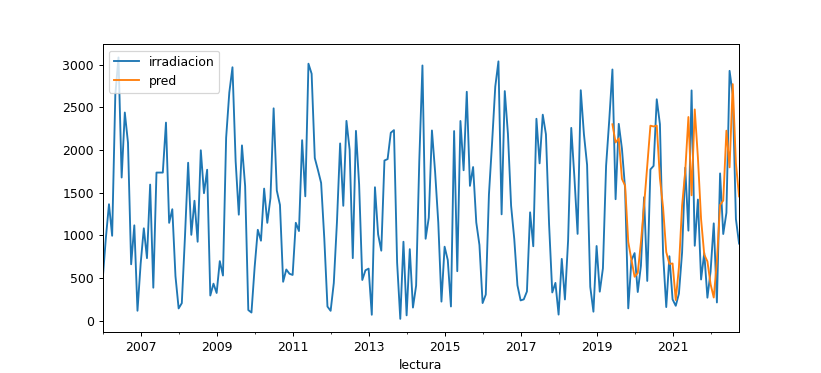

In [70]:
#Se preparan los datos ponienco como indice principal una fehca
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

from skforecast.model_selection import backtesting_forecaster

%matplotlib notebook


IRRAp=IRRA.copy()

IRRAp=IRRAp.drop(columns=["irradiacion1","irradiacion2","media_movil"])

data_train = IRRAp[:int(0.8 * (len(IRRAp)))]
data_test = IRRAp[int(0.8 * (len(IRRAp))):]

forecaster = ForecasterAutoreg(regressor=Ridge(),lags=150,transformer_y=StandardScaler())
forecaster.fit(y=data_train["irradiacion"].ffill())

metrica, predicciones = backtesting_forecaster(
    forecaster=forecaster,
    y=IRRAp["irradiacion"].ffill(),initial_train_size = len(data_train), fixed_train_size   = False,
                        steps      = 20, metric     = 'mean_squared_error', refit= True, verbose= True)

fig, ax = plt.subplots()
IRRAp.plot(label='test', ax=ax)
predicciones.plot(label='predicción', ax=ax)
ax.legend();

Information of backtesting process
----------------------------------
Number of observations used for initial training: 161
Number of observations used for backtesting: 41
    Number of folds: 3
    Number of steps per fold: 20
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2019-05-01 00:00:00  (n=161)
    Validation: 2019-06-01 00:00:00 -- 2021-01-01 00:00:00  (n=20)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2021-01-01 00:00:00  (n=181)
    Validation: 2021-02-01 00:00:00 -- 2022-09-01 00:00:00  (n=20)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2022-09-01 00:00:00  (n=201)
    Validation: 2022-10-01 00:00:00 -- 2022-10-01 00:00:00  (n=1)



<IPython.core.display.Javascript object>


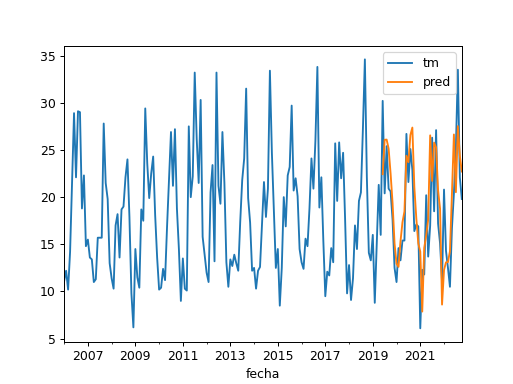

In [72]:
%matplotlib notebook


TMp=TM.copy()

TMp=TMp.drop(columns=["tm1","tm2","media_movil"])

data_train = TMp[:int(0.8 * (len(TMp)))]
data_test = TMp[int(0.8 * (len(TMp))):]

forecaster = ForecasterAutoreg(regressor=Ridge(),lags=150,transformer_y=StandardScaler())
forecaster.fit(y=data_train["tm"].ffill())

metrica, predicciones = backtesting_forecaster(
    forecaster=forecaster,
    y=TMp["tm"].ffill(),initial_train_size = len(data_train), fixed_train_size   = False,
                        steps      = 20, metric     = 'mean_squared_error', refit= True, verbose= True)

fig, ax = plt.subplots()
TMp.plot(label='test', ax=ax)
predicciones.plot(label='predicción', ax=ax)
ax.legend();

Information of backtesting process
----------------------------------
Number of observations used for initial training: 161
Number of observations used for backtesting: 41
    Number of folds: 3
    Number of steps per fold: 20
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2019-05-01 00:00:00  (n=161)
    Validation: 2019-06-01 00:00:00 -- 2021-01-01 00:00:00  (n=20)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2021-01-01 00:00:00  (n=181)
    Validation: 2021-02-01 00:00:00 -- 2022-09-01 00:00:00  (n=20)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2022-09-01 00:00:00  (n=201)
    Validation: 2022-10-01 00:00:00 -- 2022-10-01 00:00:00  (n=1)



<IPython.core.display.Javascript object>


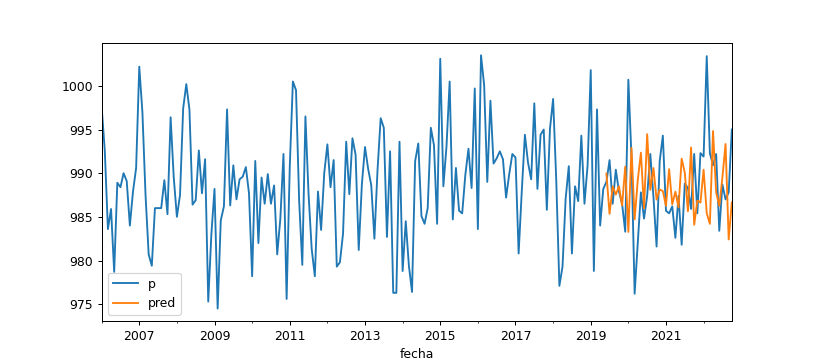

In [73]:
%matplotlib notebook


Pp=P.copy()

Pp=Pp.drop(columns=["p1","p2","media_movil"])

data_train =Pp[:int(0.8 * (len(Pp)))]
data_test = Pp[int(0.8 * (len(Pp))):]

forecaster = ForecasterAutoreg(regressor=Ridge(),lags=150,transformer_y=StandardScaler())
forecaster.fit(y=data_train["p"].ffill())

metrica, predicciones = backtesting_forecaster(
    forecaster=forecaster,
    y=Pp["p"].ffill(),initial_train_size = len(data_train), fixed_train_size   = False,
                        steps      = 20, metric     = 'mean_squared_error', refit= True, verbose= True)

fig, ax = plt.subplots()
Pp.plot(label='test', ax=ax)
predicciones.plot(label='predicción', ax=ax)
ax.legend();